# Uber Fare Predicion

### Importing libraries

In [2]:
import numpy as np
import pandas as pd

### Reading train and test data and checking details of data

In [3]:
train_df=pd.read_csv(r"train.csv",nrows=200)
test_df=pd.read_csv(r"test.csv")
print (train_df.shape)
print (train_df.columns)
print (test_df.shape)
print (test_df.columns)

(200, 8)
Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')
(9914, 7)
Index(['key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                200 non-null    object 
 1   fare_amount        200 non-null    float64
 2   pickup_datetime    200 non-null    object 
 3   pickup_longitude   200 non-null    float64
 4   pickup_latitude    200 non-null    float64
 5   dropoff_longitude  200 non-null    float64
 6   dropoff_latitude   200 non-null    float64
 7   passenger_count    200 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 12.6+ KB


### Changing pickup_datetime column into datetime object

In [5]:
train_df["pickup_datetime"]=pd.to_datetime(train_df['pickup_datetime'])

In [6]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


### Fare is based on several factors like:
1. Travelled distance
2. Time of Travel
3. Demand and Availability of Taxi
4. Some special places are more costlier like Airport or other places where there might be toll

### Checking the data

In [7]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,11.088250,-72.129763,39.730607,-72.128149,39.731270,1.770000
std,8.691217,11.579020,6.377990,11.578776,6.378135,1.391684
min,3.300000,-74.035839,0.000000,-74.035839,0.000000,1.000000
25%,5.700000,-73.994132,40.733160,-73.992982,40.731490,1.000000
50%,8.500000,-73.982926,40.748692,-73.981733,40.751558,1.000000
75%,12.600000,-73.970148,40.763612,-73.969754,40.764677,2.000000
max,58.000000,0.000000,40.828531,0.000000,40.868610,6.000000


### Checking Null Values in data

In [8]:
train_df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

#### Here we can see there are no null values


### Importing libraries for plotting graphs

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

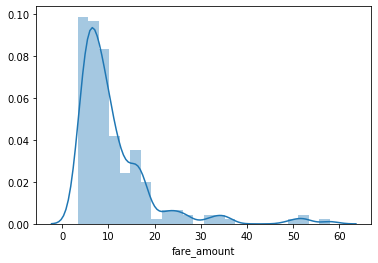

In [10]:
sns.distplot(train_df['fare_amount'])

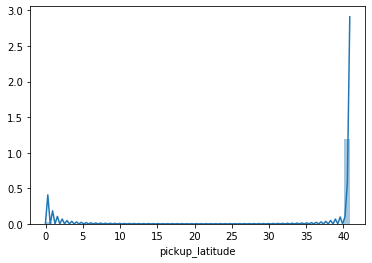

In [11]:
sns.distplot(train_df['pickup_latitude'])

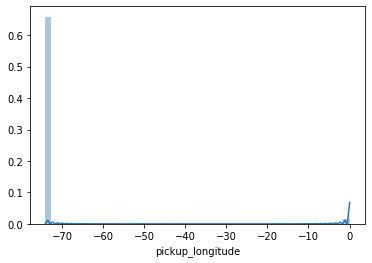

In [12]:
sns.distplot(train_df['pickup_longitude'])

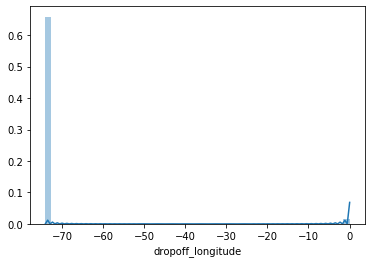

In [13]:
sns.distplot(train_df['dropoff_longitude'])

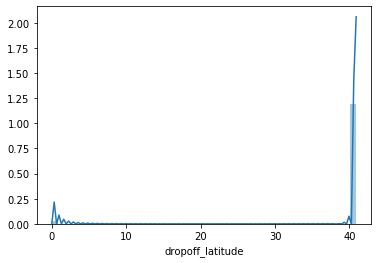

In [14]:
sns.distplot(train_df['dropoff_latitude'])

In [15]:
print("drop_off latitude min value",test_df["dropoff_latitude"].min())
print("drop_off latitude max value",test_df["dropoff_latitude"].max())
print("drop_off longitude min value", test_df["dropoff_longitude"].min())
print("drop_off longitude max value",test_df["dropoff_longitude"].max())
print("pickup latitude min value",test_df["pickup_latitude"].min())
print("pickup latitude max value",test_df["pickup_latitude"].max())
print("pickup longitude min value",test_df["pickup_longitude"].min())
print("pickup longitude max value",test_df["pickup_longitude"].max())

drop_off latitude min value 40.568973
drop_off latitude max value 41.696683
drop_off longitude min value -74.263242
drop_off longitude max value -72.990963
pickup latitude min value 40.573143
pickup latitude max value 41.709555
pickup longitude min value -74.252193
pickup longitude max value -72.986532


#### We can find out the range of latitude and logitude from the above info. We can keep data to be tested in this particular range for better accuracy.

In [16]:
min_longitude=-74.263242,
min_latitude=40.573143,
max_longitude=-72.986532, 
max_latitude=41.709555

### Dropping data from train data set which are not in above range.

In [17]:
tempdf=train_df[(train_df["dropoff_latitude"]<min_latitude) | (train_df["pickup_latitude"]<min_latitude) | (train_df["dropoff_longitude"]<min_longitude) | (train_df["pickup_longitude"]<min_longitude) | (train_df["dropoff_latitude"]>max_latitude) | (train_df["pickup_latitude"]>max_latitude) | (train_df["dropoff_longitude"]>max_longitude) | (train_df["pickup_longitude"]>max_longitude) ]
print("before droping",train_df.shape)
train_df.drop(tempdf.index,inplace=True)
print("after droping",train_df.shape)

before droping (200, 8)
after droping (195, 8)


### We know that fare also depends on day of travel as well as time of travel. Thus creating features to take care of these situations.

In [18]:
import calendar
train_df['day']=train_df['pickup_datetime'].apply(lambda x:x.day)
train_df['hour']=train_df['pickup_datetime'].apply(lambda x:x.hour)
train_df['weekday']=train_df['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
train_df['month']=train_df['pickup_datetime'].apply(lambda x:x.month)
train_df['year']=train_df['pickup_datetime'].apply(lambda x:x.year)

In [19]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,15,17,Monday,6,2009
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,5,16,Tuesday,1,2010
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,18,0,Thursday,8,2011
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,21,4,Saturday,4,2012
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,9,7,Tuesday,3,2010


### Converting categorical data (weekday) into numerical

In [20]:
train_df.weekday = train_df.weekday.map({'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6})

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 199
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                195 non-null    object             
 1   fare_amount        195 non-null    float64            
 2   pickup_datetime    195 non-null    datetime64[ns, UTC]
 3   pickup_longitude   195 non-null    float64            
 4   pickup_latitude    195 non-null    float64            
 5   dropoff_longitude  195 non-null    float64            
 6   dropoff_latitude   195 non-null    float64            
 7   passenger_count    195 non-null    int64              
 8   day                195 non-null    int64              
 9   hour               195 non-null    int64              
 10  weekday            195 non-null    int64              
 11  month              195 non-null    int64              
 12  year               195 non-null    int64          

### we will keep only those rows where number of passangers are less than or equal to 8

In [22]:
train_df['passenger_count'].max()

6

#### Here we can see maximum passengers is only 6

### Dropping key and pickup_datetime from the data set.

In [23]:
train_df.drop(["key","pickup_datetime"], axis=1, inplace=True)

In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 199
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        195 non-null    float64
 1   pickup_longitude   195 non-null    float64
 2   pickup_latitude    195 non-null    float64
 3   dropoff_longitude  195 non-null    float64
 4   dropoff_latitude   195 non-null    float64
 5   passenger_count    195 non-null    int64  
 6   day                195 non-null    int64  
 7   hour               195 non-null    int64  
 8   weekday            195 non-null    int64  
 9   month              195 non-null    int64  
 10  year               195 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 18.3 KB


### Splitting data into train and test data set.

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x=train_df.drop("fare_amount", axis=1)

In [27]:
y=train_df['fare_amount']

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [29]:
x_train.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
83,-74.009728,40.705167,-73.970897,40.749307,1,8,21,1,7,2013
120,-73.972018,40.750142,-74.006008,40.736220,5,8,21,4,11,2012
174,-73.944023,40.775959,-73.955048,40.785080,1,27,7,5,2,2015
125,-73.971696,40.763378,-73.962035,40.776598,1,10,16,5,5,2013
4,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,2010


In [30]:
x_test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
42,-73.978450,40.762920,-74.008482,40.716502,1,22,8,5,11,2013
167,-73.954598,40.786760,-73.966013,40.768112,1,13,8,3,8,2014
64,-74.003919,40.753019,-73.992368,40.735362,1,7,10,1,11,2011
35,-73.983330,40.738720,-73.933197,40.847225,1,11,3,0,1,2015
127,-73.988492,40.717977,-73.978180,40.737407,1,6,21,1,1,2014


In [31]:
x_train.shape

(156, 10)

In [32]:
x_test.shape

(39, 10)

### Using Liner Regression

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lrmodel=LinearRegression()
lrmodel.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
predictedvalues = lrmodel.predict(x_test)

### Calculate RMSE for the Linear Regression Model

In [36]:
from sklearn.metrics import mean_squared_error
lrmodelrmse = np.sqrt(mean_squared_error(predictedvalues, y_test))
print("RMSE value for Linear regression is", lrmodelrmse)

RMSE value for Linear regression is 9.802436637396971


### Using Random Forest

In [37]:
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor(n_estimators=100, random_state=101)

In [38]:
rfrmodel.fit(x_train,y_train)
rfrmodel_pred= rfrmodel.predict(x_test)

In [39]:
rfrmodel_rmse=np.sqrt(mean_squared_error(rfrmodel_pred, y_test))
print("RMSE value for Random forest regression is ",rfrmodel_rmse)

RMSE value for Random forest regression is  7.666053053158853


Here we can see that RMSE value for Random Forest Regressor is less than that of Linear Regression. Hence we will use Random Forest for our model.

### Predicting Values of test data set.

In [46]:
import calendar

test_df['day'] = test_df['pickup_datetime'].apply(lambda x:x.day)
test_df['hour'] = test_df['pickup_datetime'].apply(lambda x:x.hour)
test_df['weekday'] = test_df['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
test_df['month'] = test_df['pickup_datetime'].apply(lambda x:x.month)
test_df['year'] = test_df['pickup_datetime'].apply(lambda x:x.year)


#rfrmodel.fit(x_train,y_train)
#rfrmodel_pred = rfrmodel.predict(test_df)
#sub = pd.DataFrame()
#sub.to_csv('test_output.csv', index=False)

#sub.head()

AttributeError: 'str' object has no attribute 'day'